In [ ]:
"""Given: House size and number of bedrooms is given. 
   Predict cost of house"""

In [1]:
import os  
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
path = os.getcwd() + '/ex1data2.txt'  
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])  
data2.head() 

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [3]:
#since scale of the 3 vars is vastly different, we need to normalize
data2 = (data2 - data2.mean()) / data2.std()  
data2.head() 

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [4]:
# add ones column
data2.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data2.shape[1]  
X2 = data2.iloc[:,0:cols-1]  
y2 = data2.iloc[:,cols-1:cols]

# convert to matrices and initialize theta
X2 = np.matrix(X2.values)  
y2 = np.matrix(y2.values)  
theta2 = np.matrix(np.array([0,0,0])) 

In [5]:
"""Use L2(least squares) error for cost function"""
def computeCost(X, y, theta):  
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [6]:
def gradientDescent(X, y, theta, alpha, iters):  
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)

    for i in range(iters):
        error = (X * theta.T) - y

        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))

        theta = temp
        cost[i] = computeCost(X, y, theta)

    return theta, cost

In [8]:
# initialize variables for learning rate and iterations
alpha = 0.01  
iters = 1000
# perform linear regression on the data set
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

# get the cost (error) of the model
computeCost(X2, y2, g2)

0.13070336960771892

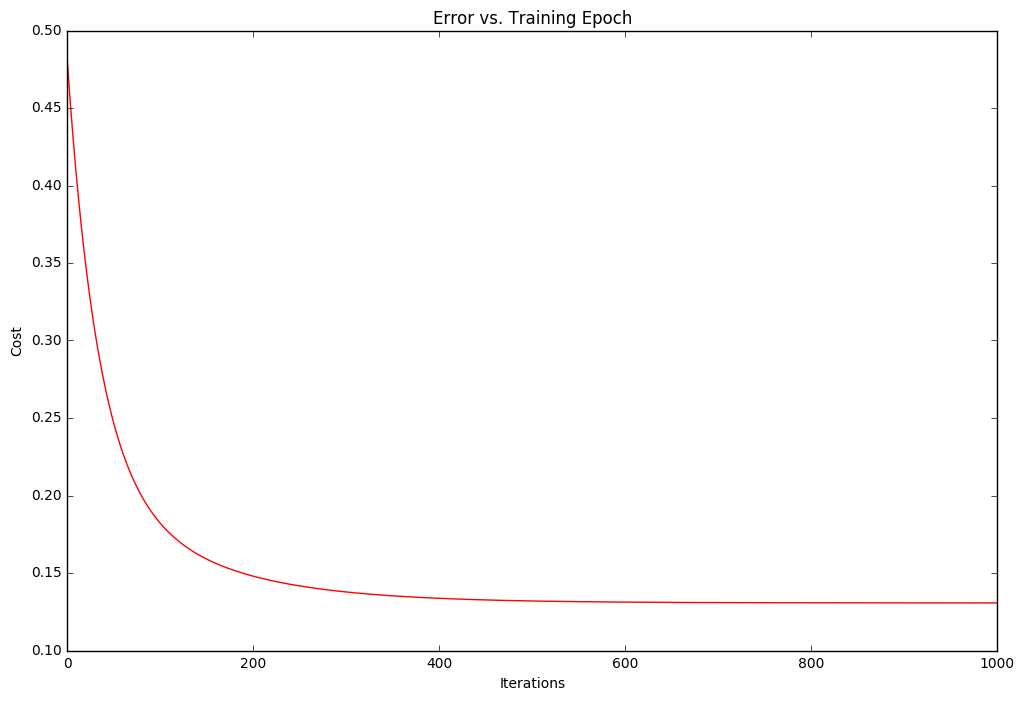

In [9]:
fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(np.arange(iters), cost2, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  